# Web Scraping

## Objective

Data scientists often need to crawl data from websites and turn the crawled data (HTML pages) to structured data (tables). Thus, web scraping is an essential skill that every data scientist should master. In this assignment, you will learn the followings:


* How to download HTML pages from a website?
* How to extract relevant content from an HTML page? 

Furthermore, you will gain a deeper understanding of the data science lifecycle.

**Requirements:**

1. Please use [pandas.DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) rather than spark.DataFrame to manipulate data.

2. Please use [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) rather than [lxml](http://lxml.de/) to parse an HTML page and extract data from the page.

3. Please follow the python code style (https://www.python.org/dev/peps/pep-0008/). If TA finds your code hard to read, you will lose points. This requirement will stay for the whole semester.

## Preliminary

If this is your first time to write a web scraper, you need to learn some basic knowledge of this topic. I found that this is a good resource: [Tutorial: Web Scraping and BeautifulSoup](https://realpython.com/beautiful-soup-web-scraper-python/). 

Please let me know if you find a better resource. I'll share it with the other students.

## Overview

Imagine you are a data scientist working at HKUST(GZ). Your job is to extract insights from HKUST(GZ) data to answer questions. 

In this assignment, you will do two tasks. Please recall the high-level data science lifecycle from Lecture 1. I suggest that when doing this assignment, please remind yourself of what data you collected and what questions you tried to answer.

## Task 1: HKUST(GZ) Information Hub Faculty Members

Sometimes you don't know what questions to ask. No worries. Start collecting data first. 

In Task 1, your job is to write a web scraper to extract the faculty information from this page: [https://facultyprofiles.hkust-gz.edu.cn/](https://facultyprofiles.hkust-gz.edu.cn/).




### (a) Crawl Web Page

A web page is essentially a file stored in a remote machine (called web server). Please write code to download the HTML page and save it as a text file ("infhfaculty.html").

将HTML文件保存至本地

In [12]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd

#打开网页
URL="https://facultyprofiles.hkust-gz.edu.cn/"

driver=webdriver.Edge()
driver.get(URL)

#等待加载
element_present=EC.presence_of_element_located((By.CLASS_NAME,"el-table__row"))
WebDriverWait(driver,10).until(element_present)

#写入本地
with open("infhfaculty.html","w",encoding="utf-8")as f:
    f.write(driver.page_source)
    
driver.quit()

print("saved")

saved


求老师的个数，以便于下载各个老师的主页HTML文件

In [49]:
with open ("infhfaculty.html","r",encoding="utf-8") as f:
    soup = BeautifulSoup(f, 'html.parser')

row_count = len(soup.find_all(class_="el-table__row"))

print(row_count)

289


将每个老师主页的HTML文件保存至本地

In [200]:
import time
import sys
from selenium.common.exceptions import StaleElementReferenceException
#打开网页
driver=webdriver.Edge()
driver.get(URL)

#等待加载
element_present=EC.presence_of_element_located((By.CLASS_NAME,"el-table__row"))
WebDriverWait(driver,10).until(element_present)

#准备列表写入"profile"
profile_list=[]

for i in range(1 , row_count + 1):
    # 定位搜索按钮,执行单击操作
    button=driver.find_element(By.XPATH,"/html/body/div/section/section/div/div[2]/div[3]/table/tbody/tr["+str(i)+"]/td[6]/div/button")
    button.click()

    # 获取打开的多个窗口句柄,切换到当前最新打开的窗口
    windows = driver.window_handles
    driver.switch_to.window(windows[-1])

    #等待加载
    element_present=EC.presence_of_element_located((By.XPATH,"/html/body/div/section/div/div[3]/div/div[1]/div/div/div[1]"))
    WebDriverWait(driver,10).until(element_present)
    time.sleep(2)
    #保存"profile"至列表
    profile_list.append(driver.current_url)
    
    #点击research interest
    

    attempts = 0
    while attempts < 2:
        try:
            try:
                interest=driver.find_element(By.XPATH,"/html/body/div/section/div/div[3]/div/div[1]/div/div/div/div[4]")
            except:
                try:
                    interest=driver.find_element(By.XPATH,"/html/body/div/section/div/div[3]/div/div[1]/div/div/div/div[3]")
                except:
                    try:
                        interest=driver.find_element(By.XPATH,"/html/body/div/section/div/div[3]/div/div[1]/div/div/div/div[2]")
                    except:
                        pass
            interest.click()
            break
        except StaleElementReferenceException:
            attempts += 1

    
    
    
    
    #等待加载
    element_present=EC.presence_of_element_located((By.XPATH,"/html/body/div/section/div/div[5]/div"))
    WebDriverWait(driver,10).until(element_present)
    
    #保存至本地
    with open("faculty_"+str(i)+".html","w",encoding="utf-8")as f:
        f.write(driver.page_source)
    
    #进度条
    print("\r", end="")
    print(str(i)+"/"+str(row_count)+"，saving: {}%: ".format(" %.3f " %(i*100/row_count)), "▋" * int(round(i*100/row_count)/2), end="" )
    sys.stdout.flush()
    
    # 关闭当前页面并加载新窗口
    driver.close()
    windows = driver.window_handles
    driver.switch_to.window(windows[-1])

driver.quit()
print("\n")
print("saved")

289/289，saving:  100.000 %:  ▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋▋

saved


### (b) Extract Structured Data

Please write code to extract relevant content (name, rank, area, profile, homepage, ...) from "infhfaculty.html" and save them as a CSV file (save as "faculty_table.csv"). 

把"profile"列表写入csv文件

In [280]:
import pandas as pd

df = pd.read_csv("faculty_table.csv")
df["profile"] = profile_list
df.to_csv("faculty_table.csv", index=False)

print("写入\"profile\"成功")

写入"profile"成功


从"infhfaculty.html"中获取"Name"，"Rank"，"Email"。

In [43]:
from bs4 import BeautifulSoup

with open ("infhfaculty.html","r",encoding="utf-8") as f:
    soup = BeautifulSoup(f, 'html.parser')

#找到所有教师的姓名
column_name = soup.find_all("td", class_="el-table_1_column_1")
#创建姓名列表
name_list=[]
#将教师姓名写入列表
for name in column_name:
    name_list.append(name.text)

#对"Rank"和"Email"进行同样的操作
column_rank=soup.find_all("td", class_="el-table_1_column_3")
rank_list=[]
for rank in column_rank:
    rank_list.append(rank.text)

column_em=soup.find_all("td", class_="el-table_1_column_5")
em_list=[]
for em in column_em:
    em_list.append(em.text)

    
#写入csv文件
df["name"] = name_list
df["rank"] = rank_list
df["email"] = em_list
df.to_csv("faculty_table.csv", index=False)

print("写入\"Name\"，\"Rank\"，\"Email\"成功")  

写入"Name"，"Rank"，"Email"成功


In [44]:
#查看csv文件，找到需要爬取的数据
df = pd.read_csv("faculty_table.csv")
df.head()

,name,rank,area,profile,homepage,email,office
0,Lei CHEN,Chair Professor,"Data-driven machine learning,Crowdsourcing-bas...",https://facultyprofiles.hkust-gz.edu.cn/facult...,https://facultyprofiles.ust.hk/profiles.php?pr...,leichen@hkust-gz.edu.cn,E3 L5 511
1,Jimmy Chi Hung FUNG,Chair ProfessorChair Professor,"Atmospheric science and weather prediction,Reg...",https://facultyprofiles.hkust-gz.edu.cn/facult...,NaN,majfung@ust.hk,NaN
2,Pan HUI,Chair ProfessorChair Professor,"Mobile computing,Computer networking,Data anal...",https://facultyprofiles.hkust-gz.edu.cn/facult...,https://panhui.people.ust.hk,panhui@hkust-gz.edu.cn,E1 L6 605
3,Alexis Kai-Hon LAU,Chair ProfessorChair Professor,Air pollution exposure and health impact asses...,https://facultyprofiles.hkust-gz.edu.cn/facult...,NaN,alau@ust.hk,NaN
4,Vincent Kin Nang LAU,Chair ProfessorChair Professor,Stochastic Optimization and Analysis for wirel...,https://facultyprofiles.hkust-gz.edu.cn/facult...,https://eeknlau.home.ece.ust.hk/HKUST-Office-H...,eeknlau@ust.hk,CWB Room 2416


从之前保存的各个详情页"faculty_i.html"中获取"area"，"homepage"，"office"。

In [50]:
import re

#创建相应的空列表
area_list=[]
homepage_list=[]
office_list=[]
year_list=[]

#解析保存的各个教师主页
for i in range(1 , row_count + 1):

    with open ("faculty_"+str(i)+".html","r",encoding="utf-8") as f:
        soup = BeautifulSoup(f, 'html.parser')
    
    #找到"area"所在位置
    interest=soup.find_all("p", class_="content")
    area_i=""
    for res_in in interest:
        area_i=area_i+res_in.text+","
    
    #写入列表，去除多余符号
    area_list.append(area_i.rstrip(","))
    
    #对"homepage"和"office"进行同样的操作
    hp_i=soup.find("a",string="Personal Web")
    homepage_list.append(hp_i.get("href"))
    
    office_i=soup.find("p",class_="icon-text")
    office_list.append(office_i.text)
     
    #顺便将毕业年份写入列表
    grad=soup.find("div",class_="degree-detail")
    grad_text=grad.text
    #使用正则表达式来提取字符串中的年份
    year_i= re.findall(r"\b\d{4}\b", grad_text)
    try:
        year_i=int(year_i[0])
    except:
        year_i=0
    year_list.append(year_i)
    
#写入csv文件
df["area"] = area_list
df["homepage"] = homepage_list
df["office"] = office_list
df.to_csv("faculty_table.csv", index=False)

print("写入\"area\"，\"homepage\"，\"office\"成功")  

写入"area"，"homepage"，"office"成功


In [39]:
#核对csv文件
df = pd.read_csv("faculty_table.csv")
df.head()

,name,rank,area,profile,homepage,email,office
0,Lei CHEN,Chair Professor,"Data-driven machine learning,Crowdsourcing-bas...",https://facultyprofiles.hkust-gz.edu.cn/facult...,https://facultyprofiles.ust.hk/profiles.php?pr...,leichen@hkust-gz.edu.cn,E3 L5 511
1,Jimmy Chi Hung FUNG,Chair ProfessorChair Professor,"Atmospheric science and weather prediction,Reg...",https://facultyprofiles.hkust-gz.edu.cn/facult...,NaN,majfung@ust.hk,NaN
2,Pan HUI,Chair ProfessorChair Professor,"Mobile computing,Computer networking,Data anal...",https://facultyprofiles.hkust-gz.edu.cn/facult...,https://panhui.people.ust.hk,panhui@hkust-gz.edu.cn,E1 L6 605
3,Alexis Kai-Hon LAU,Chair ProfessorChair Professor,Air pollution exposure and health impact asses...,https://facultyprofiles.hkust-gz.edu.cn/facult...,NaN,alau@ust.hk,NaN
4,Vincent Kin Nang LAU,Chair ProfessorChair Professor,Stochastic Optimization and Analysis for wirel...,https://facultyprofiles.hkust-gz.edu.cn/facult...,https://eeknlau.home.ece.ust.hk/HKUST-Office-H...,eeknlau@ust.hk,CWB Room 2416


### (c) Interesting Finding

Note that you don't need to do anything for Task 1(c). The purpose of this part is to give you some sense about how to leverage Exploratory Data Analysis (EDA) to come up with interesting questions about the data. EDA is an important topic in data science; you will  learn it soon from this course. 


First, please install [dataprep](http://dataprep.ai).
Then, run the cell below. 
It shows a bar chart for every column. What interesting findings can you get from these visualizations? 

In [26]:
pip install dataprep

Note: you may need to restart the kernel to use updated packages.


In [73]:
from dataprep.eda import plot
import pandas as pd

df = pd.read_csv("faculty_table.csv")
plot(df)

Below are some examples:

**Finding 1:** Assistant Professor# (~76) is more than 5x larger than Associate Professor# (10). 

**Questions:** Why did it happen? Is it common in all CS schools in the world? Will the gap go larger or smaller in five years? What actions can be taken to enlarge/shrink the gap?


**Finding 2:** The Homepage has 22% missing values. 

**Questions:** Why are there so many missing values? Is it because many faculty do not have their own homepages or do not add their homepages to the school page? What actions can be taken to avoid this to happen in the future? 

## Task 2: Age Follows Normal Distribution?

In this task, you start with a question and then figure out what data to collect.

The question that you are interested in is `Does HKUST(GZ) Info Hub faculty age follow a normal distribution?`

To estimate the age of a faculty member, you can collect the year in which s/he graduates from a university (`gradyear`) and then estimate `age` using the following equation:

$$age \approx 2023+23 - gradyear$$

For example, if one graduates from a university in 1990, then the age is estimated as 2023+23-1990 = 56. 



### (a) Crawl Web Page

You notice that faculty profile pages contain graduation information. For example, you can see that Dr. Yuyu LUO graduated from Tsinghua University in 2023 at [https://facultyprofiles.hkust-gz.edu.cn/faculty-personal-page/LUO-Yuyu/yuyuluo](https://facultyprofiles.hkust-gz.edu.cn/faculty-personal-page/LUO-Yuyu/yuyuluo). 


Please write code to download the profile pages (info hub faculties) and save each page as a text file. 

这部分前面已经写好了

### (b) Extract Structured Data

Please write code to extract the earliest graduation year (e.g., 2023 for Dr. Yuyu LUO) from each profile page, and create a csv file like [faculty_grad_year.csv](./faculty_grad_year.csv). 

In [53]:
#此前已将毕业年份保存，这里只需写入csv文件
import pandas as pd

df_1 = pd.read_csv("faculty_grad_year.csv")
df_1["gradyear"]=year_list
df_1["name"]=name_list
df_1.to_csv("faculty_grad_year.csv", index=False)

print("写入成功")


写入成功


In [54]:
df_1 = pd.read_csv("faculty_grad_year.csv")
df_1.head()

,name,gradyear
0,Lei CHEN,2005
1,Jimmy Chi Hung FUNG,1990
2,Pan HUI,2008
3,Alexis Kai-Hon LAU,1991
4,Vincent Kin Nang LAU,1998


### (c) Interesting Finding

Similar to Task 1(c), you don't need to do anything here. Just look at different visualizations w.r.t. age and give yourself an answer to the question: `Does HKUST(GZ) Info Hub faculty age follow a normal distribution?`

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
# 各种细节配置如 文字大小，图例文字等杂项
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params) # 设置 matplotlib 的各种参数
plt.style.use('seaborn-whitegrid') # seaborn 主题
sns.set_style("white")
plt.rc('font', **{'family': 'Microsoft YaHei, SimHei'})  # 设置中文字体的支持
# sns.set(font='SimHei')  # 解决Seaborn中文显示问题，但会自动添加背景灰色网格
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

import scipy.stats as stats # 统计学库
from scipy.stats import norm  # 用于拟合正态分布曲线


def norm_comparision_plot(data, figsize=(12, 10), color="#099DD9",
                          ax=None, surround=True, grid=True):
    """
    function: 传入 DataFrame 指定行，绘制其概率分布曲线与正态分布曲线(比较)
    color: 默认为标准天蓝  #F79420:浅橙  ‘green’：直接绿色(透明度自动匹配)
    ggplot 经典三原色：'#F77B72'：浅红, '#7885CB'：浅紫, '#4CB5AB'：浅绿
    ax=None: 默认无需绘制子图的效果；  surround：sns.despine 的经典组合，
                                         默认开启，需要显式关闭
    grid：是否添加网格线，默认开启，需显式关闭                             
    """
    plt.figure(figsize=figsize) # 设置图片大小
    # fit=norm: 同等条件下的正态曲线(默认黑色线)；lw-line width 线宽
    sns.distplot(data, fit=norm, color=color, \
                 kde_kws={"color" :color, "lw" :3 }, ax=ax)
    (mu, sigma) = norm.fit(data)  # 求同等条件下正态分布的 mu 和 sigma
    # 添加图例：使用格式化输入，loc='best' 表示自动将图例放到最合适的位置
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'. \
               format(mu, sigma)] ,loc='best')
    plt.ylabel('Frequency')
    plt.title("Distribution")
    if surround == True:
        # trim=True-隐藏上面跟右边的边框线，left=True-隐藏左边的边框线
        # offset：偏移量，x 轴向下偏移，更加美观
        sns.despine(trim=True, left=True, offset=10)
    if grid == True:
        plt.grid(True)  # 添加网格线



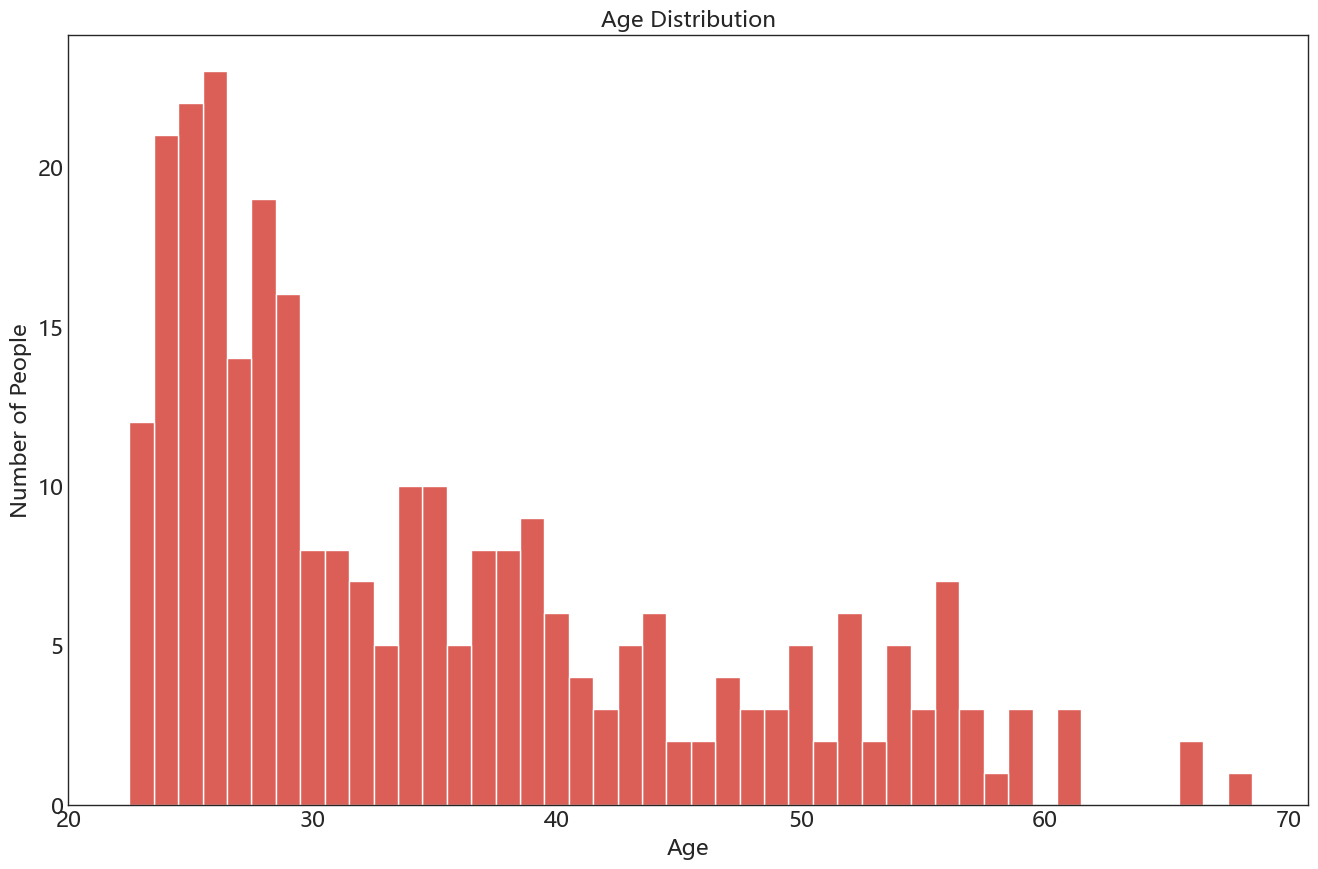

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats # 统计学库
from scipy.stats import norm  # 用于拟合正态分布曲线

df_1= pd.read_csv("faculty_grad_year.csv")
df_1["age"] = 2023+23-df_1["gradyear"]
#之前将缺失值设为0，现在将其过滤掉
df_1 = df_1.query("age <= 100")
age_counts = df_1["age"].value_counts()

#绘图
plt.bar(age_counts.index, age_counts.values,width=1)
plt.xlabel('Age')  
plt.ylabel('Number of People')  
plt.title('Age Distribution') 
plt.xticks(range(20, 71,10))
plt.show()  # 显示图表

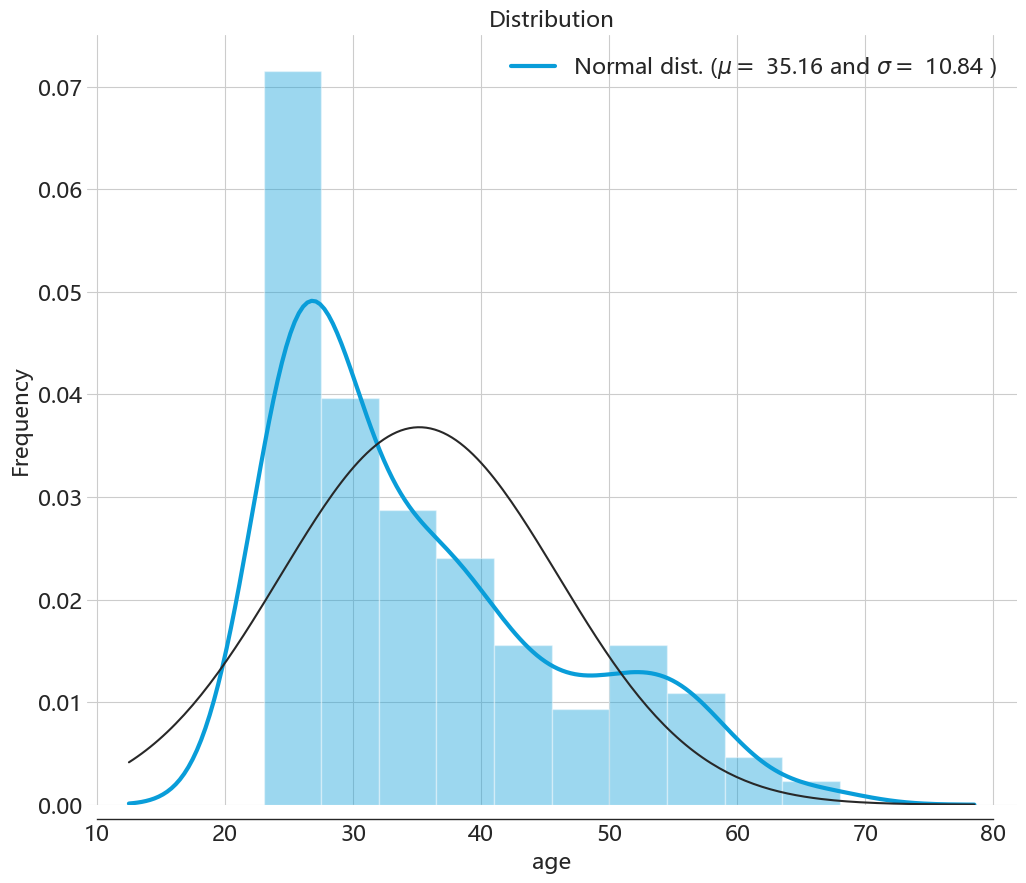

In [59]:
#拟合一条正态分布曲线  

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params) # 设置 matplotlib 的各种参数
plt.style.use('seaborn-whitegrid') # seaborn 主题
sns.set_style("white")
plt.rc('font', **{'family': 'Microsoft YaHei, SimHei'})  # 设置中文字体的支持
# sns.set(font='SimHei')  # 解决Seaborn中文显示问题，但会自动添加背景灰色网格
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

def norm_comparision_plot(data, figsize=(12, 10), color="#099DD9",
                          ax=None, surround=True, grid=True):
    plt.figure(figsize=figsize) # 设置图片大小
    # fit=norm: 同等条件下的正态曲线(默认黑色线)；lw-line width 线宽
    sns.distplot(data, fit=norm, color=color, \
                 kde_kws={"color" :color, "lw" :3 }, ax=ax)
    (mu, sigma) = norm.fit(data)  # 求同等条件下正态分布的 mu 和 sigma
    # 添加图例：使用格式化输入，loc='best' 表示自动将图例放到最合适的位置
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'. \
               format(mu, sigma)] ,loc='best')
    plt.ylabel('Frequency')
    plt.title("Distribution")
    if surround == True:
        # trim=True-隐藏上面跟右边的边框线，left=True-隐藏左边的边框线
        # offset：偏移量，x 轴向下偏移，更加美观
        sns.despine(trim=True, left=True, offset=10)
    if grid == True:
        plt.grid(True)  # 添加网格线

norm_comparision_plot(data=df_1["age"])

## Submission

Complete the code in this notebook, and submit it to the Canvas assignment `Assignment 1`.